# Розв’язання крайової задачі

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import math

def Middlepoint(h,t0,tn,x0,f):
  # h - крок чисельного розв'язання
  # t0 - початковий час, не обов'язково дорівнює 0
  # tn - кінцевий час
  # x0=[x(t0),x'(t0)] - вектор заданих початкових умов
  # f - функція, що задана дифрівнянням
    n=math.ceil((tn-t0)/h) #кількість кроків, округлена вгору
    t=[t0+i*h for i in range(n+1)]
    t=np.array(t)  #створюємо масив часу
    x=np.array([np.zeros(n+1) for i in range(2)]) #заготовка для масивів координати та швидкості
    # 0й елемент - координата, 1й елемент - перша похідна, швидкість
    x[:,0]=x0 #вносимо початкові умови
    for i in range(n): #і буде мати значення від 0 до n-1
        x2=f(t[i],x[:,i]) #обчислюємо поточне прискорення
        x[1,i+1]=x[1,i]+x2*h #формула явного методу Ейлера для швидкості
        x[0,i+1]=x[0,i]+(x[1,i]+x[1,i+1])*h/2 #координата визначається на основі середньої арифметичної швидкості
    return (t,x,'Middle Point Method')

def Strilba(h,t0,tn,x0,xn,f,eps, printLog = False):
    # h - крок чисельного розв'язання
    # t0 - початковий час, не обов'язково дорівнює 0
    # tn - кінцевий час
    # x0=x(t0) - вектор заданих початкових умов
    # f - функція, що задана дифрівнянням
    # xn - крайова умова
    # v1,v2 - пристрілочні значення
    v1=(np.random.rand(1)*5)[0]
    xn1=Middlepoint(h, t0, tn, [x0,v1], f)[1][0,-1]
    delta1=xn1-xn
    if delta1>0:
        v2=-v1
    else:
        v2=10*v1
    xn2=Middlepoint(h, t0, tn, [x0,v2], f)[1][0,-1]
    delta2=xn2-xn
    while delta1*delta2>0:
        v2=v2*10
        xn2=Middlepoint(h, t0, tn, [x0,v2], f)[1][0,-1]
        delta2=xn2-xn 
    for i in range(50):
        v3=np.tan((np.arctan(v1)+np.arctan(v2))/2)
        xn3=Middlepoint(h, t0, tn, [x0,v3], f)[1][0,-1]
        if(printLog):
            print('#', i, 'v0 =', v3, 'xn =', xn3) # результати ітерації: номер ітерації, початкова швидкість, кінцева точка після пристрілки
        delta3=xn3-xn
        if abs(delta3)<eps:
            return (v3,xn3,delta3,i)
        if delta1*delta3>0:
            v1=v3
            delta1=delta3
        else:
            v2=v3
            delta2=delta3
    return (v3,xn3,delta3,i)
def StrilbaOptimal(h,t0,tn,x0,f,xn=4, printLog = False):
    eps = 0.0001
    v3,xn3,delta3,i = Strilba(h,t0,tn,x0[0],xn,f,eps,printLog)
    print('Optimal: #', i, 'v0 =', v3, 'xn =', xn3) # результати ітерації: номер ітерації, початкова швидкість, кінцева точка після пристрілки
    x0 = [0, v3]
    return Middlepoint(h, t0, tn, x0, f), v3
def StrilbaOptimalOnlySolution(h,t0,tn,x0,f,xn=4):
    return StrilbaOptimal(h,t0,tn,x0,f,xn)[0]
def StrilbaLin(h,t0,tn,x0,f,xn=4):
    # h - крок чисельного розв'язання
    # t0 - початковий час, не обов'язково дорівнює 0
    # tn - кінцевий час
    # x0=x(t0) - вектор заданих початкових умов
    # f - функція, що задана дифрівнянням
    # xn - крайова умова
    # v1,v2 - пристрілочні значення
    v1=(np.random.rand(1)*5)[0]
    x1=Middlepoint(h,t0,tn,[x0,v1],f)[1][0]
    B1=xn1=x1[-1]
    v2=(np.random.rand(1)*10)[0]
    x2=Middlepoint(h,t0,tn,[x0,v2],f)[1][0]
    n=math.ceil((tn-t0)/h) #кількість кроків, округлена вгору
    t=[t0+i*h for i in range(n+1)]
    t=np.array(t)
    B2=xn2=x2[-1]
    B=xn
    x=((B-B2)*x1+(B1-B)*x2)/(B1-B2)
    return (t, x, 'Strilba Linear Method')

def ProgonkaLin(h,t0,tn,x0,f,xn=4,K=[0.3, -0.01, 1]):
    # f - функція, що у дифрівнянні відповідає за залежність від часу
    # K=[K0,K1,K2] - коефіцієнти біля координати, швидкості та прискорення у рівнянні
    n=math.ceil((tn-t0)/h) #кількість кроків, округлена вгору
    t=[t0+i*h for i in range(n+1)]
    t=np.array(t)  #створюємо масив часу
    x=np.zeros(n+1) #заготовка для масиву координати
    x[0]=x0
    x[-1]=xn
    k=K[2]/h/h+K[1]/2/h
    l=-K[2]/h/h-K[0]
    m=K[2]/h/h-K[1]/2/h
    a=np.zeros(n+1) 
    b=np.zeros(n+1)
    a[1]=m/l;
    b[1]=(f(t[1])-x[0]*k)/l;
    for i in range(2,n-1):
        a[i]=m/(l-k*a[i-1])
        b[i]=(f(t[i])-b[i-1]*k)/(l-k*a[i-1])
    x[n-1]=(f(t[n-1])-x[n]*m-b[n-2]*k)/(l-k*a[n-2])
    for i in reversed(range(1,n-1)):
        x[i]=b[i]-a[i]*x[i+1]
    return (t,x, 'Progonka Linear Method')

def SimpleIter(h,t0,tn,x0,f,xn=4,K=[0.3, -0.01, 1]):
  # f - функція, що у дифрівнянні відповідає за залежність від часу та нелінійну залежність від функції та похідної
  # K=[K0(t),K1(t),K2] - коефіцієнти біля координати, швидкості та прискорення у рівнянні
  # er - похибка між сусідніми наближеннями, по досягненню якої припиняємо ітерації
    eps = 0.001
    n=math.ceil((tn-t0)/h) #кількість кроків, округлена вгору
    t=[t0+i*h for i in range(n+1)]
    t=np.array(t)  #створюємо масив часу
    a=np.zeros(n+1) 
    b=np.zeros(n+1)
    c=np.zeros(n+1)
    for i in range(1,n):
        c[i]=-h**2/(2*K[2]+h*K[0])
        a[i]=-c[i]*(K[2]/h/h+K[1]/2/h)
        b[i]=-c[i]*(K[2]/h/h-K[1]/2/h)
    vmean=(xn-x0)/(tn-t0)
    X0=np.array([x0+i*vmean*h for i in range(n+1)]) # створюємо нульове наближення з ідеї рівномірного руху
    X1=np.zeros(n+1) #заготовка для масиву координати 1-го наближення
    X1[0]=x0
    X1[-1]=xn
    for k in range(1000): # k - кількість ітерацій
        for i in range(1,n):
            X1[i]=a[i]*X0[i-1]+b[i]*X0[i+1]+c[i]*f(t[i],X0[i-1],X0[i],X0[i+1])
        if max(abs(X1-X0))<eps:
            return (t,X1,'Simple Iteration')
        X0=np.array([X1[i] for i in range(n+1)])
    return (t,X1,'Simple Iteration')

def PlotApproximateSolutionCoordinate(T, X, name, solution):
    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 8))
    ax.plot(T, X, label = 'Approximate Solution')
    X1 = solution(T)
    ax.plot(T, X1[0], ':', label = 'Solution')
    t0, tn = T.min(), T.max()
    ax.grid(True)
    ax.legend()
    ax.set_xlim(t0, tn)
    ax.set_xlabel('t')
    ax.set_ylabel('Coordinate x')
    ax.set_title(name + ' for coordinate\ndifferent steps')
    
    ers = (X1[0] - X) ** 2
    er = np.sqrt(np.sum(ers) / len(X))
    print("Errors:", er)
def PlotApproximateSolution(T, X, name, solution):
    fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 8))
    axs[0].plot(T, X[0], label = 'Approximate Solution')
    axs[1].plot(T, X[1], label = 'Approximate Solution')
    X1 = solution(T)
    axs[0].plot(T, X1[0], ':', label = 'Solution')
    axs[1].plot(T, X1[1], ':', label = 'Solution')
    t0, tn = T.min(), T.max()
    for i in range(2):
        axs[i].grid(True)
        axs[i].legend()
        axs[i].set_xlim(t0, tn)
        axs[i].set_xlabel('t')# plt.ylim(xmin, xmax)
    axs[0].set_ylabel('Coordinate x')
    axs[1].set_ylabel('Velocity v')
    axs[0].set_title(name + ' for coordinate\ndifferent steps')
    axs[1].set_title(name + ' for velocity\ndifferent steps')
    
    ers = (X1 - X) ** 2
    er = np.sqrt(np.sum(ers, axis=1) / len(X[0]))
    print("Errors:", er)

# Оцінка похибок

In [2]:
def Error(Method, H, t0, tn, x0, f, solution):
    """
    дослідження похибки від кроку
        
    Arguments:
      Method - назва функції, що задає метод
      H - масив кроків, з якими будемо розв'язувати рівняння та досліджувати стійкість H=(0.01, 0.1, 0.5)
      t0 - початковий час, не обов'язково дорівнює 0
      tn - кінцевий час
      x0=x(t0) - задана початкова умова
      f - функція, що задана дифрівнянням
      solution - функція, що описує аналітичний розв'язок рівняння
        
    Returnes:
      plot
    """
    Er = []
    for h in H:
        (t, x, name) = Method(h, t0, tn, x0, f)# x - чисельний розв 'язок
        sol = solution(t)
        er = np.sqrt(np.sum((sol[0] - x) ** 2) / len(sol))
        Er = Er + [er]
    plt.plot(H, Er, label = name)
    plt.grid(True)
    plt.ylim(0, max(Er))
    plt.xlabel('Step h')
    plt.ylabel('Error')
    plt.title('Error dependence on step for ' + name)
def Errorh2(Method,H,t0,tn,x0,f,solution):
    """
    дослідження похибки від кроку МЕТОДОМ ПОДВІЙНОГО ПРОРАХУНКУ
        
    Arguments:
      Method - назва функції, що задає метод
      H - масив кроків, з якими будемо розв'язувати рівняння та досліджувати стійкість H=(0.01, 0.1, 0.5)
      t0 - початковий час, не обов'язково дорівнює 0
      tn - кінцевий час
      x0=x(t0) - задана початкова умова
      f - функція, що задана дифрівнянням
      solution - функція, що описує аналітичний розв'язок рівняння
        
    Returnes:
      plot
    """
    Er = []
    for h in H:
        (t, x, name) = Method(h, t0, tn, x0, f)# x - чисельний розв 'язок
        sol = Method(h / 2, t0, tn, x0, f)[1]# x - чисельний розв 'язок з кроком вдвічі менше
        sol = [sol[i]
            for i in range(len(sol)) if i % 2 == 0
        ]
        if len(x) != len(sol):
            L = min(len(x), len(sol))
            x = x[: L]
            sol = sol[: L]
        er = math.sqrt(np.sum((sol - x) ** 2) / len(sol))
        Er = Er + [er]
    plt.plot(H, Er, label = name)
    plt.grid(True)
    plt.ylim(0, max(Er))
    plt.xlabel('Step h')
    plt.ylabel('Error')
    plt.title('Error dependence on step for ' + name + '\n halved step')
    
# Створюємо функцію для дослідження похибки від кроку
def Error2(Method,H,t0,tn,x0,f,solution):
    n=len(x0) #визначимо кількість рядків
    Er=[[] for i in range(n)]
    for h in H:
        (t,x,name)=Method(h,t0,tn,x0,f) #x - чисельний розв'язок
        sol=solution(t)
        for i in range(n):
            er=math.sqrt(np.sum((sol[i]-x[i])**2)/len(sol[i]))
            Er[i]=Er[i]+[er]
    fig, erplot=plt.subplots(nrows=1,ncols=2,figsize=(12,5))
    for i in range(n):
        erplot[i].plot(H,Er[i])
        erplot[i].grid(True)
        erplot[i].set_ylim(0,max(Er[i]))
        erplot[i].set_xlabel('Step h')
        erplot[i].set_ylabel('Error')
    erplot[0].set_title('Error dependence for coordinate\non step for '+name)
    erplot[1].set_title('Error dependence for velocity\non step for '+name)
    
# Створюємо функцію для дослідження похибки від кроку
def Error2h2(Method,H,t0,tn,x0,f,solution):
    n=len(x0) #визначимо кількість рядків
    Er=[[] for i in range(n)]
    for h in H:
        (t,x,name)=Method(h,t0,tn,x0,f) #x - чисельний розв'язок
        sol=Method(h/2,t0,tn,x0,f)[1] #x - чисельний розв'язок з кроком вдвічі менше
        for k in range(n):
            a=[sol[k,i] for i in range(len(sol[0])) if i%2==0]
            b=x[k]
            if len(b)!=len(a):
                L=min(len(b),len(a))
                b=b[:L]
                a=a[:L]
            er=math.sqrt(np.sum((b-a)**2)/len(a))
            Er[k]=Er[k]+[er]
    fig, erplot=plt.subplots(nrows=1,ncols=2,figsize=(12,5))
    for i in range(n):
        erplot[i].plot(H,Er[i])
        erplot[i].grid(True)
        erplot[i].set_ylim(0,max(Er[i]))
        erplot[i].set_xlabel('Step h')
        erplot[i].set_ylabel('Error')
    erplot[0].set_title('Error dependence for coordinate\non step for '+name)
    erplot[1].set_title('Error dependence for velocity\non step for '+name)

# Дослідження

## Умова задачі
Варіант 12
### Завдання 1
Розв’яжіть крайову задачу, задану згідно з варіантом, та оцініть вплив нелінійності на систему:
- розпочніть розгляд лінійної задачі – для цього приберіть всі нелінійні доданки з рівняння
- розв’яжіть лінійну задачу методом стрільби та методом скінченних різниць (використайте метод прогонки для розв’язання тридіагональної системи рівнянь)
- оцініть точність кожного розв’язку: визначте похибку порівняно з аналітичним розв’язком та перевірте, як на це впливає крок
- розв’яжіть нелінійну задачі методом стрільби та методом скінченних різниць(за допомогою методу простих ітерацій та методу Ньютона)
- оцініть точність кожного розв’язку методом подвійного прорахунку
- зробіть висновки про вплив нелінійності на систему
<br>

### Завдання 2.
Вважайте, що задане у завданні 1 рівняння описує рух частинки по вертикалі, тоді як по горизонталі дана частинка рухається з постійною швидкістю, що дорівнює 0.1 ум. од. довжини за 1 ум. од. часу. Створіть анімацію руху частинки.
<br>
$$ \frac{F_y}{m} =-\frac{0.000004}{(y+4)^7} + \frac{0.002}{(y+4)^4} + 0.3y - 0.01y' $$
$$ y(0) = 0, y(5) = 4 $$
<br>

$$ y'' =-\frac{0.000004}{(y+4)^7} + \frac{0.002}{(y+4)^4} + 0.3y - 0.01y' $$
$$ y(0) = 0, y(5) = 4 $$
### Завдання 1
#### Лінійна задача
$$ y'' = - 0.01y' + 0.3y $$
$$ y(0) = 0, y(5) = 4 $$
##### Аналітичний розв'язок лінійного рівняння
(отримано за допомогою Wolfram Alpha)
$$ y(t) = e^{-0.552745t}(0.26627e^{1.09549t}-0.26627) $$

In [3]:
(t0,tn)=(0,5)
h = 0.1
x0 = [0,0]
xn = 4
eps = 0.0001
# 0й елемент - початкове значення 0ї похідної - самої координати
# 1й елемент - початкове значення 1ї похідної - швидкості


def equation1(t,x): # функція задана дифрівнянням
    #x[0] - координата
    #x[1] - швидкість
    return -0.000004/(x[0]+4)**7+0.002/(x[0] + 4)**4 + 0.3 * x[0] - 0.01*x[1]

def equation1lin(t,x): # лінійна частина дифрівняння
    #x[0] - координата
    #x[1] - швидкість
    return 0.3 * x[0] - 0.01*x[1]

def solution1lin(t): # аналітичний розв'язок лінійного дифрівняння
    dy = (-0.552745)*np.exp(-0.552745 * t)*(0.26627 * np.exp(1.09549*t) - 0.26627) + np.exp(-0.552745 * t)*(0.26627 * np.exp(1.09549*t))*1.09549
    y = np.exp(-0.552745 * t)*(0.26627 * np.exp(1.09549*t) - 0.26627)
    return np.array([y, dy])

# Функція в правій частині лінійного рівняння, що залежить лише від часу. Може бути відсутня = 0
def equation1lin_t(t):
    return 0

# Функція в правій частині НЕлінійного рівняння, приклад на слайді 7
def equation1nonlin(t,x0,x1,x2):
    return -0.000004/(x1+4)**7+0.002/(x1 + 4)**4

# коефіцієнти для метода скінченних різниць
K=[0.3, -0.01, 1]
#K = [1, -0.01, 0.3]
def eqK0():
    return K[0]
def eqK1():
    return K[1]
def eqK2():
    return K[2]
eqK = [eqK0,eqK1,eqK2]

#Кроки для стійкості
H1=(0.005, 0.01, 0.05, 0.1, 0.25)

#Кроки для похибки
H2=np.arange(0.002,0.1+0.002,0.006)
H2_2 = np.arange(0.01, 1 + 0.1, 0.2)
#Дуже маленькі кроки для похибки
H2_3=np.arange(0.0002, 0.002, 0.00002)

# Лінійна задача: метод стрільби

Спершу розв'язуємо лінійну задачу методом стрільби і методом скінченних різниць. <br>
Для заданого кроку h методом стрільби знайдемо оптимальну швидкість.
Зобразимо даний розв'язок на графіках координат та швидкості разом із аналітичним розв'язком, також порахуємо точність розв'язку.

In [4]:
((T,(X,V),name), v) = StrilbaOptimal(h,t0,tn,x0,equation1lin,xn,True)

# 0 v0 = 0.0 xn = 0.0
# 1 v0 = 0.7995301197469721 xn = 10.57555867951062
# 2 v0 = 0.35062014709732436 xn = 4.637728896342105
# 3 v0 = 0.1702298998773754 xn = 2.2516678867959787
# 4 v0 = 0.25845504582749473 xn = 3.418641068868409
# 5 v0 = 0.3039468188375392 xn = 4.020370638549857
# 6 v0 = 0.28106616695108 xn = 3.717723282716305
# 7 v0 = 0.2924712306278185 xn = 3.8685805389696086
# 8 v0 = 0.29820000903726473 xn = 3.944356336196841
# 9 v0 = 0.3010711347525164 xn = 3.982333340099464
# 10 v0 = 0.30250840382555777 xn = 4.001344410532942
# 11 v0 = 0.30178962644402907 xn = 3.991836985874234
# 12 v0 = 0.3021489793739156 xn = 3.9965902251866816
# 13 v0 = 0.30232868265331014 xn = 3.9989671995234826
# 14 v0 = 0.30241854100205123 xn = 4.000155775433864
# 15 v0 = 0.302373611268432 xn = 3.99956148008137
# 16 v0 = 0.30239607599541735 xn = 3.9998586259081326
# 17 v0 = 0.30240730846377667 xn = 4.000007200208605
Optimal: # 17 v0 = 0.30240730846377667 xn = 4.000007200208605


Errors: [0.01363391 0.01007884]


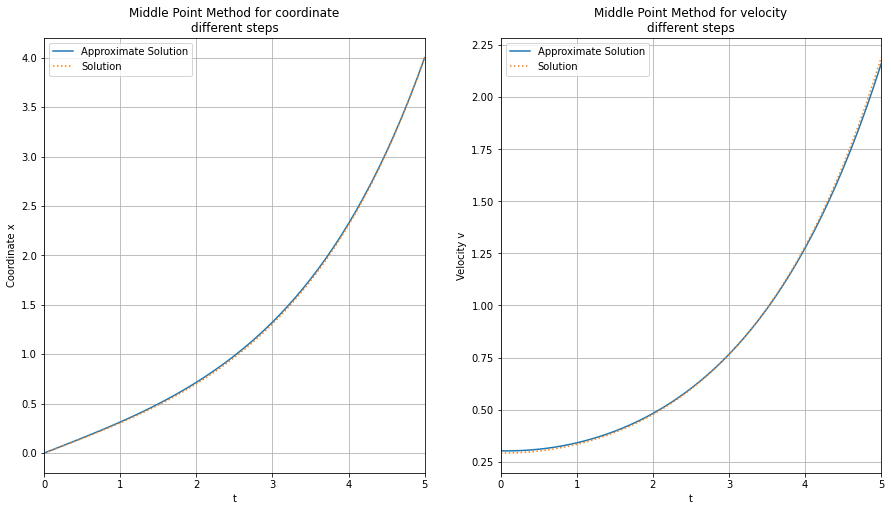

In [5]:
PlotApproximateSolution(T, (X, V), name, solution1lin)

Optimal: # 15 v0 = 0.2922348890110503 xn = 4.0000137429385445
Optimal: # 14 v0 = 0.2927763333370142 xn = 4.000072070054302
Optimal: # 17 v0 = 0.29706398767029757 xn = 4.0000364464926985
Optimal: # 17 v0 = 0.3024077643046687 xn = 4.000013229715166
Optimal: # 16 v0 = 0.3183358325924073 xn = 3.99996889680051


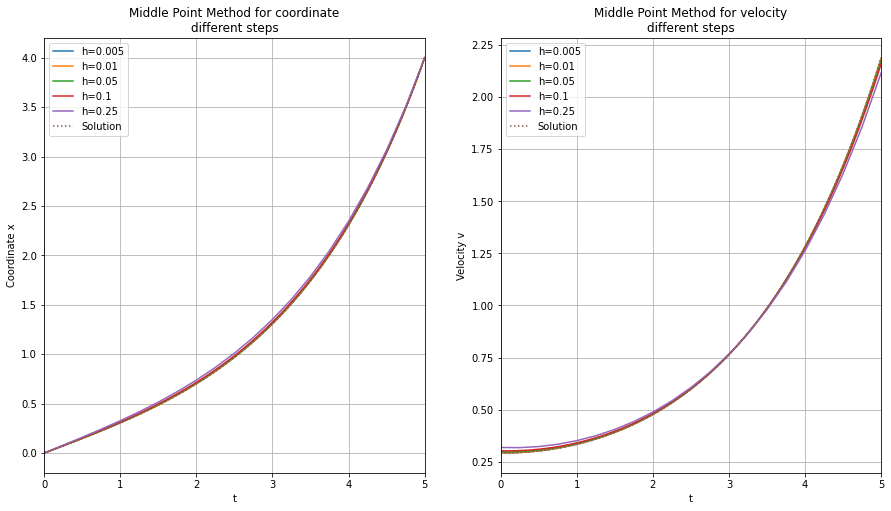

In [84]:
StabilityAnalysis(StrilbaOptimalOnlySolution,H1,t0,tn,x0,equation1lin,solution1lin)

Optimal: # 17 v0 = 0.2919105030300008 xn = 3.9999865609902163
Optimal: # 16 v0 = 0.29256342613957464 xn = 4.000098619122018
Optimal: # 16 v0 = 0.2912825222844149 xn = 3.9999680014658994
Optimal: # 17 v0 = 0.29384533786247485 xn = 4.000007300507506
Optimal: # 12 v0 = 0.29160976546516776 xn = 3.9999734976331522
Optimal: # 16 v0 = 0.2913031521698035 xn = 4.000080321120794
Optimal: # 13 v0 = 0.2932088574239754 xn = 3.9999887109425076
Optimal: # 15 v0 = 0.2938485840568571 xn = 3.9999924254245673
Optimal: # 15 v0 = 0.2970647492308932 xn = 4.000046701085195
Optimal: # 17 v0 = 0.29130508854573434 xn = 4.00000237607872
Optimal: # 15 v0 = 0.2947971000249788 xn = 3.999903494113393
Optimal: # 16 v0 = 0.29384075384476555 xn = 3.9999645471519263
Optimal: # 17 v0 = 0.29447746557480536 xn = 3.999993473445118
Optimal: # 13 v0 = 0.2938338028360454 xn = 3.9999595111723147
Optimal: # 14 v0 = 0.28910989514569624 xn = 4.000094712664104
Optimal: # 15 v0 = 0.2919219763031974 xn = 3.9999149297833183
Optimal: #

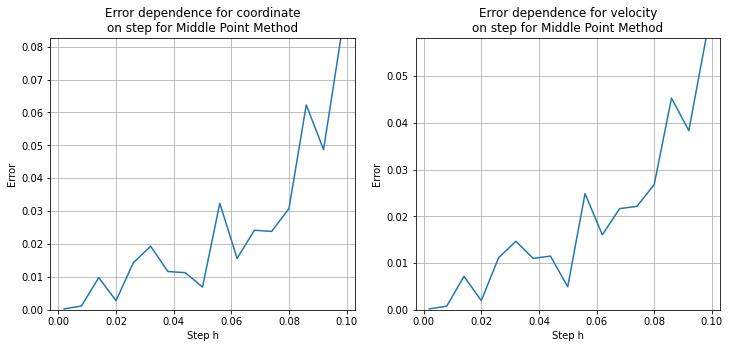

In [6]:
Error2(StrilbaOptimalOnlySolution,H2,t0,tn,x0,equation1lin,solution1lin)

Із графіків бачимо, що метод стійкий і доволі точний. Оцінимо похибки для різних кроків h. Для кожного h будемо шукати оптимальну швидкість (будемо виводити лише її, а не всі кроки пошуку). Після цього для оптимальної швидкості будемо будувати розв'язок і оцінювати його похибку у порівнянні із аналітичним розв'язком.

# Лінійна задача: лінійний метод стрільби

Тепер розв'яжемо лінійне рівняння лінійним методом стрільби і оцінимо похибки. Бачимо, що для маленьких кроків h - точність методу не сильно відрізняєтсья від попереднього способу. Проте по мірі зростання h похибка зростає швидше.

Errors: 0.013631683851633585


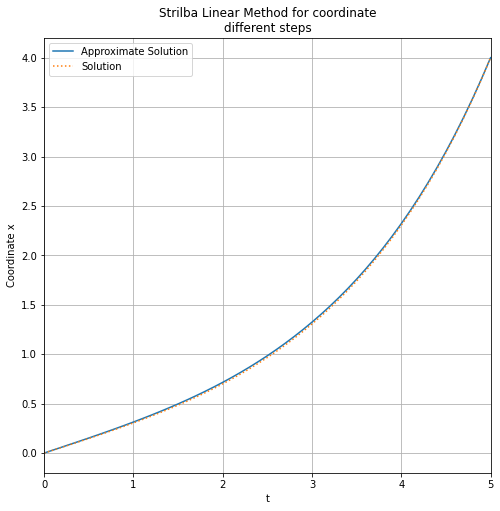

In [8]:
(T,X,name) = StrilbaLin(h, t0, tn, x0[0], equation1lin, xn)
PlotApproximateSolutionCoordinate(T, X, name, solution1lin)

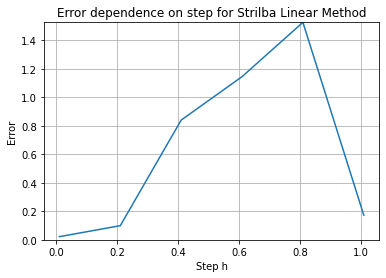

In [9]:
Error(StrilbaLin, H2_2, t0, tn, x0[0], equation1lin, solution1lin)

# Лінійна задача: метод скінченних різниць

Тепер розв'яжемо лінійне рівняння методом скінченних різнциь. Метод доаолі неточний і по мірі зменшення кроку починає осцилювати, що видно на графіку похибок.

Errors: 2.9680645636129626


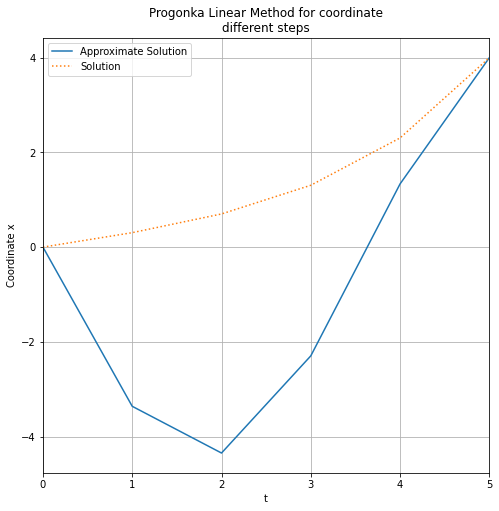

In [90]:
h = 1
(T,X,name) = ProgonkaLin(h, t0, tn, x0[0], equation1lin_t, xn, K)
PlotApproximateSolutionCoordinate(T, X, name, solution1lin)

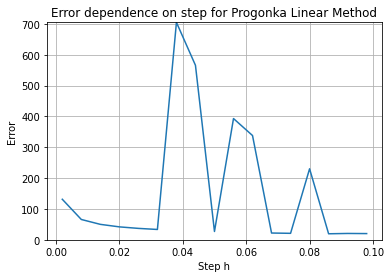

In [97]:
Error(ProgonkaLin, H2, t0, tn, x0[0], equation1lin_t, solution1lin)

# Нелінійна задача: метод стрільби

Розв'яжемо нелінійне рівняння методом стрільби і методом скінченних різниць.
Спершу побудуємо розв'язок для фіксованого кроку h і побудуємо разом із аналітичним розв'язком лінійного рівняння. Це дає уявлення про вплив нелінійної чатисни на розв'язок. У нашому випадку він не значний.

In [98]:
((T,(X,V),name), v) = StrilbaOptimal(h,t0,tn,x0,equation1,xn,True)

# 0 v0 = 0.0 xn = 0.00014181938587234813
# 1 v0 = 0.7547702311662983 xn = 7.61350010861735
# 2 v0 = 0.33502639643688187 xn = 3.3795386679982147
# 3 v0 = 0.526868062489327 xn = 5.3146463210151165
# 4 v0 = 0.42762497299452773 xn = 4.313580412215018
# 5 v0 = 0.3806132012233301 xn = 3.8393725943544648
# 6 v0 = 0.4039272250841546 xn = 4.0745411606169455
# 7 v0 = 0.39222402225840347 xn = 3.9564909422366843
# 8 v0 = 0.39806385787410165 xn = 4.015397367919822
# 9 v0 = 0.3951410261044268 xn = 3.985914761466271
# 10 v0 = 0.39660171007733475 xn = 4.000648681777823
# 11 v0 = 0.39587118554148026 xn = 3.993279880216325
# 12 v0 = 0.39623640211854094 xn = 3.9969638201058246
# 13 v0 = 0.39641904466852673 xn = 3.998806135651485
# 14 v0 = 0.3965103745147408 xn = 3.9997273798836246
# 15 v0 = 0.39655604158138563 xn = 4.000188023621909
# 16 v0 = 0.3965332078694132 xn = 3.999957699950695
Optimal: # 16 v0 = 0.3965332078694132 xn = 3.999957699950695


Errors: [0.11404794 0.12942897]


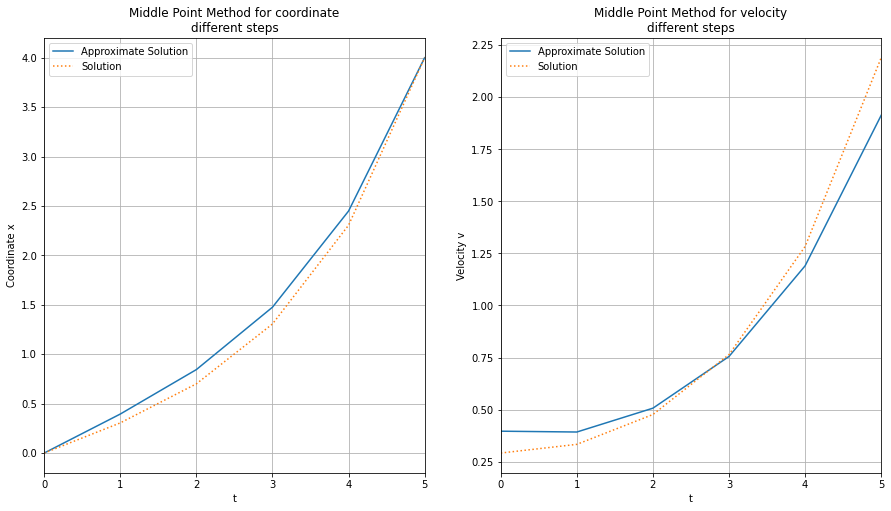

In [99]:
PlotApproximateSolution(T, (X, V), name, solution1lin)

Optimal: # 12 v0 = 0.2927641616703788 xn = 4.000023506898165
Optimal: # 16 v0 = 0.29222753056913636 xn = 4.000030868844778
Optimal: # 14 v0 = 0.307476988373637 xn = 4.000038012406802
Optimal: # 15 v0 = 0.2964636524395741 xn = 4.0000362139381265
Optimal: # 17 v0 = 0.2823901102142294 xn = 4.000005382002165
Optimal: # 15 v0 = 0.2933671537042601 xn = 4.000056571181266
Optimal: # 16 v0 = 0.2777095014278203 xn = 4.000027421077907
Optimal: # 17 v0 = 0.2940721337807606 xn = 3.999991305372351
Optimal: # 16 v0 = 0.2702789568479214 xn = 4.000006160053509
Optimal: # 16 v0 = 0.2915944499156256 xn = 4.000012568989532
Optimal: # 16 v0 = 0.38801193729440037 xn = 4.000022417137886
Optimal: # 14 v0 = 0.33635785692433506 xn = 3.999982558741741


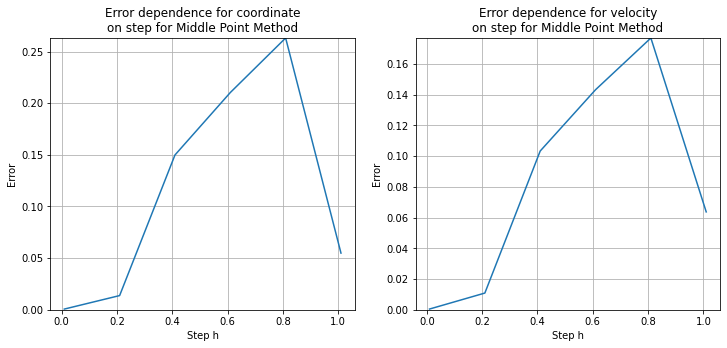

In [102]:
Error2h2(StrilbaOptimalOnlySolution,H2_2,t0,tn,x0,equation1,solution1lin)

Також оцінимо похибки методом подвійного підрахунку для різних кроків. Бачимо, що вони дещо більші у порівнянні із похибками для лінійного рівняння.

# Нелінійна задача: метод скінченних різниць

Аналогічно скористаємось методом скінченних різниць для нелінійного рівняння. і оцінимо його похибки. Бачимо, що вони дещо більші у порівнянні із похибками для лінійного рівняння.

Errors: 0.9300739856958673


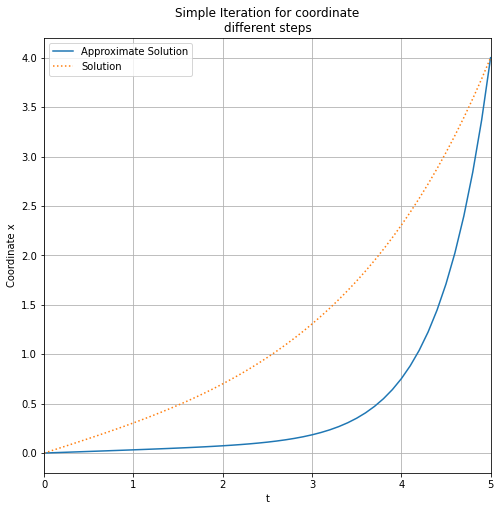

In [19]:
(T,X,name) = SimpleIter(h, t0, tn, x0[0], equation1nonlin, xn, K)
PlotApproximateSolutionCoordinate(T, X, name, solution1lin)

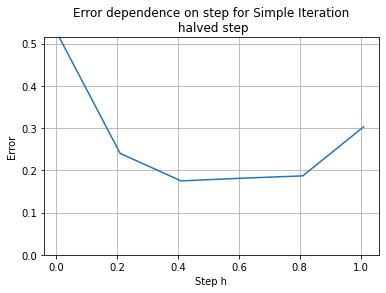

In [20]:
Errorh2(SimpleIter,H2_2,t0,tn,x0[0],equation1nonlin,solution1lin)

# Анімація руху частинки

In [47]:
(T,X,name) = StrilbaLin(1, t0, tn, x0[0], equation1lin, xn)
print(X.shape)

(501,)


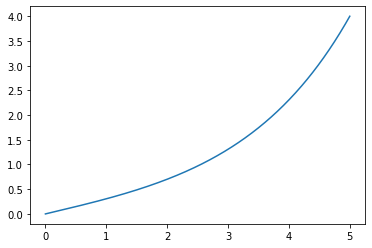

In [50]:
plt.plot(T,X)

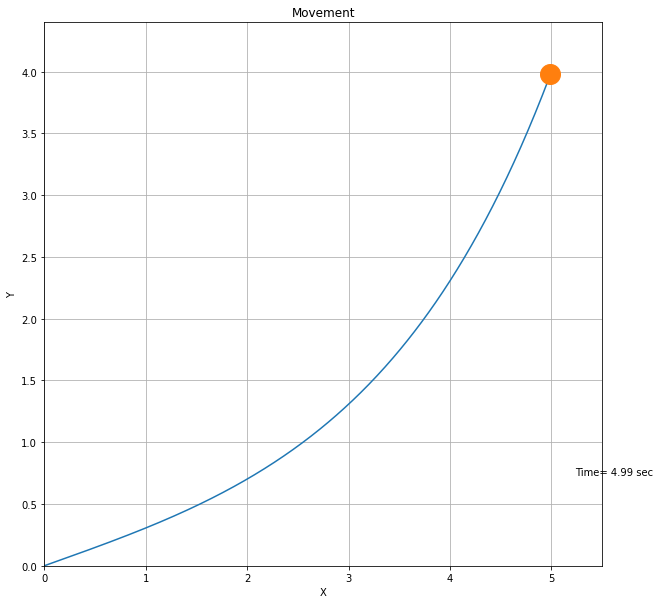

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.animation import FuncAnimation

fig = plt.figure(figsize=(10, 10))
y=np.array([X[i] for i in range(len(X))])
x=np.array([T[i] for i in range(len(X))])
ymax = y.max()
xmax = x.max()
         
def animate(i):
    plt.cla()
    Y = y[0:i+1]
    X = x[0:i+1]
    plt.title('Movement')
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.grid(True)
    plt.xlim(0,xmax * 1.1) # важливо прописати межі по горизонтальній осі
    plt.ylim(0,ymax * 1.1) # важливо прописати межі по вертикальній осі
    plt.plot(X,Y)
    plt.plot(x[i],y[i],marker='o',markersize=20)
    plt.text(xmax * 1.2, 0.8,'Time= '+str(T[i])+' sec',fontsize = 10, ha='right', va='top')
    return fig
 
anim = FuncAnimation(fig, animate, frames=500, interval=20)
 
anim.save('Particle movement.gif', writer='pillow')